### Regression Analysis
Elements Of Data Science

In [1]:
# Import Numpy and Datascience modules.
import numpy as np
from datascience import *
import pandas as pd

# Plotting 
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', UserWarning)

#### Correlation and regression tools

In [2]:
def standard_units(xyz):
    "Convert any array of numbers to standard units."
    return (xyz - np.mean(xyz))/np.std(xyz)  
def correlation(t, label_x, label_y):
    return np.mean(standard_units(t.column(label_x))*standard_units(t.column(label_y)))
# Regression
def slope(t, label_x, label_y):
    r = correlation(t, label_x, label_y)
    return r*np.std(t.column(label_y))/np.std(t.column(label_x))
def intercept(t, label_x, label_y):
    return np.mean(t.column(label_y)) - slope(t, label_x, label_y)*np.mean(t.column(label_x))

##### Apply tools to hybrid car data

In [3]:
import pandas as pd
url = "http://users.stat.ufl.edu/~winner/data/hybrid_reg.csv"
hybrid_df = pd.read_csv(url)
hybrid_T = Table.from_df(hybrid_df) # Reading and converting using pandas dataframe
hybrid = Table.read_table(url)
hybrid
hybrid_T


carid,vehicle,year,msrp,accelrate,mpg,mpgmpge,carclass,carclass_id
1,Prius (1st Gen),1997,24509.7,7.46,41.26,41.26,C,1
2,Tino,2000,35355,8.2,54.1,54.1,C,1
3,Prius (2nd Gen),2000,26832.2,7.97,45.23,45.23,C,1
4,Insight,2000,18936.4,9.52,53,53,TS,7
5,Civic (1st Gen),2001,25833.4,7.04,47.04,47.04,C,1
6,Insight,2001,19036.7,9.52,53,53,TS,7
7,Insight,2002,19137,9.71,53,53,TS,7
8,Alphard,2003,38084.8,8.33,40.46,40.46,MV,4
9,Insight,2003,19137,9.52,53,53,TS,7
10,Civic,2003,14071.9,8.62,41,41,C,1


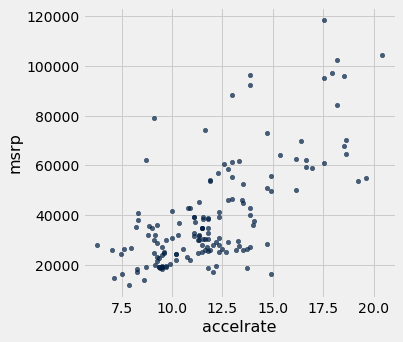

In [4]:
hybrid.scatter('accelrate', 'msrp')

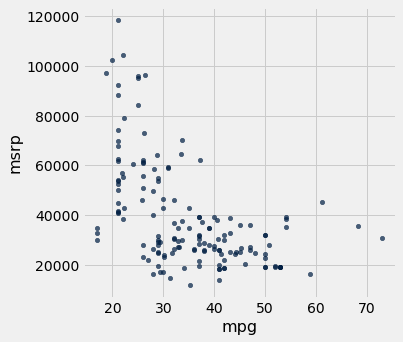

In [5]:
hybrid.scatter('mpg', 'msrp')

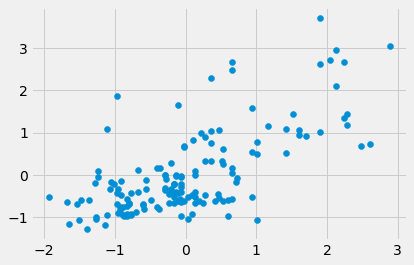

In [6]:
plt.scatter(standard_units(hybrid.column('accelrate')), standard_units(hybrid.column('msrp')), label="data")

In [7]:
def plot_data_and_regress(dataset, x, y):
    """Makes a scatter plot of the dataset, and a regression line."""
    xdata, ydata = dataset.column(x), dataset.column(y)
    plt.scatter(standard_units(xdata), standard_units(ydata), label="data in standard units")
    r = correlation(dataset,x,y)
    print("Correlation, r: ",np.round(r,6))
    slp = np.round(slope(dataset,x,y))
    print('Slope of Regression Line:    ', slp, 'y per x')
    intercp = np.round(intercept(dataset,x,y))
    print('Intercept of Regression Line:', intercp, 'y')
    xs, ys = zip([-2, -2*r], [2, 2*r])
    plt.plot(xs, ys, 'r',label="regression line")
    plt.legend(bbox_to_anchor=(1.0,.8))
    dataset.scatter(x,y, label="data in original units")
    xs, ys = zip([xdata.min(), xdata.min()*slp+intercp], [xdata.max(), xdata.max()*slp+intercp])
    plt.plot(xs, ys, 'g',label="regression line")
    plt.legend(bbox_to_anchor=(1.07,0.8))

Correlation, r:  0.695578
Slope of Regression Line:     5068.0 y per x
Intercept of Regression Line: -21282.0 y


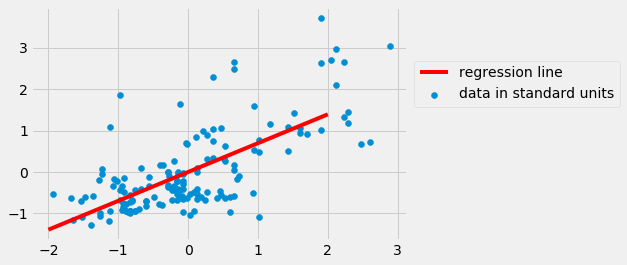

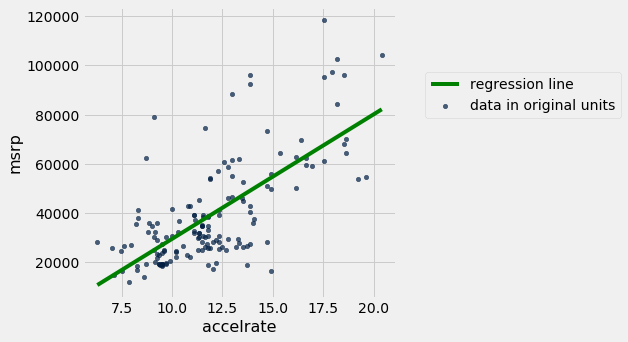

In [8]:
plot_data_and_regress(hybrid,'accelrate','msrp')

In [9]:
def rmse(dataset,x,y):
    xdata, ydata = dataset.column(x), dataset.column(y)
    slp = np.round(slope(dataset,x,y))
    print('Slope of Regression Line:    ', slp, 'y per x')
    intercp = np.round(intercept(dataset,x,y))
    print('Intercept of Regression Line:', intercp, 'y')
    fitted = slp * xdata + intercp
    mse = np.mean((ydata - fitted) ** 2)
    print("Root mean squared error:", mse ** 0.5)

In [10]:
rmse(hybrid,'accelrate','msrp')

Slope of Regression Line:     5068.0 y per x
Intercept of Regression Line: -21282.0 y
Root mean squared error: 15339.646665465307


In [ ]:
def lw_mse(any_slope, any_intercept):
    x = little_women.column('Periods')
    y = little_women.column('Characters')
    fitted = any_slope*x + any_intercept
    return np.mean((y - fitted) ** 2)

In [22]:
def lw_mse(any_slope,any_intercept):
    xdata, ydata = hybrid.column('accelrate'), hybrid.column('msrp')
    fitted = any_slope * xdata + any_intercept
    mse = np.mean((ydata - fitted) ** 2)
    print("Root mean squared error:", mse ** 0.5)
    return mse

In [23]:
best = minimize(lw_mse)
best

Root mean squared error: 44742.41246511989
Root mean squared error: 44742.41246511989
Root mean squared error: 44730.93086161264
Root mean squared error: 44712.35417312308
Root mean squared error: 42694.76716320163
Root mean squared error: 16154.414690073761
Root mean squared error: 65954.64303161329
Root mean squared error: 16154.414690073761
Root mean squared error: 29283.944542799352
Root mean squared error: 22109.7271345521
Root mean squared error: 16159.802158899083
Root mean squared error: 16159.80215890118
Root mean squared error: 16154.414690073761
Root mean squared error: 16154.489358122675
Root mean squared error: 16154.29400501366
Root mean squared error: 16142.106262110585
Root mean squared error: 16109.355972564987
Root mean squared error: 16194.957069473361
Root mean squared error: 16109.355972564987
Root mean squared error: 16121.873322209747
Root mean squared error: 16114.1383223109
Root mean squared error: 16109.360484737557
Root mean squared error: 16109.36048473781
R

Root mean squared error: 15416.85810209676
Root mean squared error: 15416.776431300448
Root mean squared error: 15416.703427719493
Root mean squared error: 15416.703427719496
Root mean squared error: 15416.703321630846
Root mean squared error: 15415.657041998455
Root mean squared error: 15418.52012520232
Root mean squared error: 15415.657041998455
Root mean squared error: 15416.085979529797
Root mean squared error: 15415.80278297049
Root mean squared error: 15415.656842642464
Root mean squared error: 15415.656947293915
Root mean squared error: 15414.653826839229
Root mean squared error: 15415.656842642464
Root mean squared error: 15414.653826839229
Root mean squared error: 15417.648378295406
Root mean squared error: 15414.653826839229
Root mean squared error: 15415.124018394
Root mean squared error: 15414.779615066238
Root mean squared error: 15414.652088287978
Root mean squared error: 15414.652188766688
Root mean squared error: 15414.652188766688
Root mean squared error: 15414.6520882

array([  4704.56749136, -16588.52767294])

### Values from minimization and regression
### Minimization
any_slope = 4704.56749136  any_intercept = -16588.5276729
### Regression
Slope of Regression Line:     5068.0 y per x
Intercept of Regression Line: -21282.0 y